This is my code file for my latest machine learning project where I am tasked with differentiating between phishing emails and normal emails.

In [56]:
!pip install --upgrade pandas


   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 2.0 MB/s eta 0:00:06
    --------------------------------------- 0.3/11.6 MB 4.3 MB/s eta 0:00:03
   - -------------------------------------- 0.5/11.6 MB 4.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/11.6 MB 4.8 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/11.6 MB 4.9 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.6 MB 5.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.7/11.6 MB 5.6 MB/s eta 0:00:02
   ------ --------------------------------- 2.0/11.6 MB 5.8 MB/s eta 0:00:02
   ------- -------------------------------- 2.3/11.6 MB 5.9 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.6 MB 6.0 MB/s eta 0:00:02
   --------- ------------------------------ 2.9/11.6 MB 6.1 MB/s eta 0:00:02
   ---------- ----------------------------- 3.2/11.6 MB 6.0 MB/s eta 0:00:02
   ---

In [57]:
import pandas as pd

df = pd.read_csv("Phishing_Email.csv", index_col = 0)

df = df.dropna(subset=['Email Text'])

# Naive Bayes Model non-cleaned

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.pipeline import make_pipeline

X = df['Email Text']
y = df['Email Type'].apply(lambda x: 1 if x == 'Phishing Email' else 0)  # Convert labels to binary


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that combines the TF-IDF vectorizer and Naive Bayes model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2209
           1       0.97      0.76      0.85      1518

    accuracy                           0.89      3727
   macro avg       0.91      0.87      0.88      3727
weighted avg       0.90      0.89      0.89      3727

Accuracy: 0.8921384491548162


# Clean the data

In [59]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

True

In [60]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function to clean text data
def clean_email_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'\W+', ' ', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    # Lowercase
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stop words and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in string.punctuation]
    # Join the words back into one string
    text = ' '.join(tokens)
    return text

# Apply the cleaning function to your email text
df['Cleaned Email Text'] = df['Email Text'].apply(clean_email_text)


Instead of using Email Type for X, I used Cleaned Email Text, where we removed HTML tags, special characters and numbers,
single characters, and replaced multiple spaces with single ones, transformed all characters to lowercase, used 
tokenization, and removed stop words

In [61]:
# Assuming your DataFrame is named df and has columns 'Email Text' for the text and 'Email Type' for the labels
X = df['Cleaned Email Text']
y = df['Email Type'].apply(lambda x: 1 if x == 'Phishing Email' else 0)  # Convert labels to binary

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that combines the TF-IDF vectorizer and Naive Bayes model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2209
           1       0.97      0.83      0.89      1518

    accuracy                           0.92      3727
   macro avg       0.93      0.90      0.91      3727
weighted avg       0.92      0.92      0.92      3727

Accuracy: 0.9189696807083445


3% accuracy increase

# Random Forest 

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Assuming df is your DataFrame and it's already preprocessed
X = df['Cleaned Email Text']  # Make sure this is your preprocessed text
y = df['Email Type'].apply(lambda x: 1 if x == 'Phishing Email' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF Vectorizer and Random Forest Classifier
pipeline = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=100))

# Train the model
pipeline.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2209
           1       0.95      0.97      0.96      1518

    accuracy                           0.97      3727
   macro avg       0.96      0.97      0.96      3727
weighted avg       0.97      0.97      0.97      3727

Accuracy: 0.9659243359270191


5-Fold Cross Validation

In [86]:
for i in range(5,11):
    num_folds = i

    # Use accuracy as the scoring metric
    scoring = make_scorer(accuracy_score)

    # Perform k-fold cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=num_folds, scoring=scoring)

    # Calculate the mean and standard deviation of the cross-validation scores
    mean_cv_score = cv_scores.mean()
    std_dev_cv_score = cv_scores.std()

    print(f'Number of folds: {num_folds}')
    print(f"Mean CV Accuracy: {mean_cv_score}")
    print(f"Standard Deviation of CV Accuracy: {std_dev_cv_score}")

Number of folds: 5
Mean CV Accuracy: 0.9624341587069507
Standard Deviation of CV Accuracy: 0.0026249491205507115
Number of folds: 6
Mean CV Accuracy: 0.9638827798187429
Standard Deviation of CV Accuracy: 0.0032593970637385485
Number of folds: 7
Mean CV Accuracy: 0.9644735429859397
Standard Deviation of CV Accuracy: 0.0032555008882908985
Number of folds: 8
Mean CV Accuracy: 0.9645805960302732
Standard Deviation of CV Accuracy: 0.0025706994021242545
Number of folds: 9
Mean CV Accuracy: 0.9648492732370156
Standard Deviation of CV Accuracy: 0.003960730753602902
Number of folds: 10
Mean CV Accuracy: 0.9649025580597081
Standard Deviation of CV Accuracy: 0.00416800962254759


# CNN

In [87]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from sklearn.model_selection import train_test_split

# Parameters
vocab_size = 10000  # Number of unique tokens
max_length = 650  # Max length of a sequence
embedding_dim = 100  # Dimensionality of embedding vector
trunc_type = 'post'
padding_type = 'post' #to have a uniform shape and size. Adds padding at end of sequence
oov_tok = '<OOV>'

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

# CNN Model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy']) #BC designed for binary classification tasks

# Model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 650, 100)          1000000   
                                                                 
 conv1d_1 (Conv1D)           (None, 646, 128)          64128     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_18 (Dense)            (None, 24)                3096      
                                                                 
 dense_19 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1067249 (4.07 MB)
Trainable params: 1067249 (4.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

# CNN With Early Stopping

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=3,  # Number of epochs with no improvement after which training will be stopped
                               verbose=1,  # Logging level
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity

# Train the model with the early stopping callback
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping])  # Add early stopping callback here


Epoch 1/10
420/420 [==============================] - 4s 9ms/step - loss: 0.0192 - accuracy: 0.9894 - val_loss: 0.1540 - val_accuracy: 0.9604
Epoch 2/10
420/420 [==============================] - 4s 9ms/step - loss: 0.0191 - accuracy: 0.9895 - val_loss: 0.1561 - val_accuracy: 0.9618
Epoch 3/10
420/420 [==============================] - 4s 9ms/step - loss: 0.0189 - accuracy: 0.9895 - val_loss: 0.1627 - val_accuracy: 0.9618
Epoch 4/10
420/420 [==============================] - 4s 9ms/step - loss: 0.0189 - accuracy: 0.9895 - val_loss: 0.1676 - val_accuracy: 0.9624
Epoch 4: early stopping


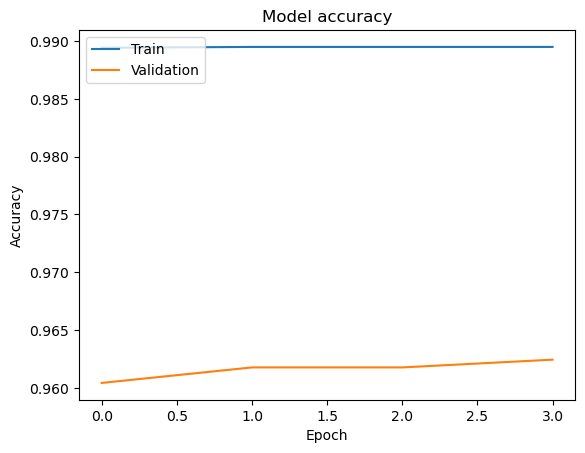

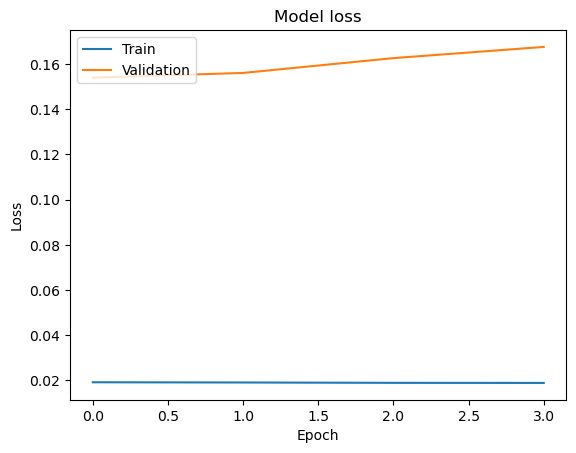

In [66]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [67]:
df[df['Email Type'] == 'Phishing Email']['Email Text']

3        \nHello I am your hot lil horny toy.\n    I am...
4        software at incredibly low prices ( 86 % lower...
7        entourage , stockmogul newsletter ralph velez ...
8        we owe you lots of money dear applicant , afte...
10       make her beg you to give it to her everynight ...
                               ...                        
18635    congratulations you have won ! ! ! pls contact...
18638                                                empty
18639    strong buy alert : monthly newsletter topstock...
18646    date a lonely housewife always wanted to date ...
18650                                                empty
Name: Email Text, Length: 7312, dtype: object

Word Embedding

In [68]:
#tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

# Choose a maximum length
max_length = 650 

X_padded = pad_sequences(sequences, padding='post', maxlen=max_length)



In [69]:
X_padded = pad_sequences(sequences, padding='post', maxlen=max_length, truncating='post')

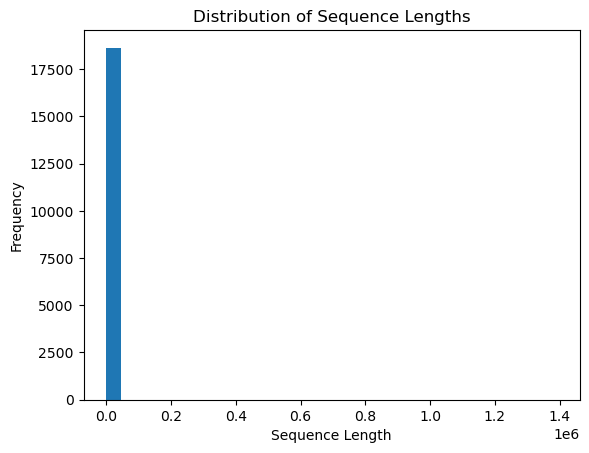

In [70]:
import matplotlib.pyplot as plt

sequence_lengths = [len(seq) for seq in sequences]
plt.hist(sequence_lengths, bins=30)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.show()


In [71]:
import numpy as np

# Assuming sequence_lengths is a list of all sequence lengths
sequence_lengths = [len(seq) for seq in sequences]

# Calculate the 90th and 95th percentiles
pct_90 = np.percentile(sequence_lengths, 90)
pct_95 = np.percentile(sequence_lengths, 95)

print(f"90th percentile: {pct_90}")
print(f"95th percentile: {pct_95}")


90th percentile: 384.0
95th percentile: 616.3499999999985


In [72]:
#loading pre-trained word embeddings from the GloVe website
embedding_index = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coeffs


In [73]:
#create embedding matrix
embedding_dim = 100  # Dimensionality of the GloVe embeddings 
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector  # Words not found will be all-zeros.


In [74]:
#build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential([
    Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=X_padded.shape[1], trainable=False),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 650, 100)          15400700  
                                                                 
 flatten_4 (Flatten)         (None, 65000)             0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080032   
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17480765 (66.68 MB)
Trainable params: 2080065 (7.93 MB)
Non-trainable params: 15400700 (58.75 MB)
_________________________________________________________________


In [75]:
#Train and Evaluate the Model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/10
373/373 [==============================] - 6s 17ms/step - loss: 0.3142 - accuracy: 0.8650 - val_loss: 0.2216 - val_accuracy: 0.9058
Epoch 2/10
373/373 [==============================] - 6s 16ms/step - loss: 0.0854 - accuracy: 0.9676 - val_loss: 0.2398 - val_accuracy: 0.9071
Epoch 3/10
373/373 [==============================] - 6s 16ms/step - loss: 0.0420 - accuracy: 0.9840 - val_loss: 0.2374 - val_accuracy: 0.9095
Epoch 4/10
373/373 [==============================] - 6s 16ms/step - loss: 0.0283 - accuracy: 0.9883 - val_loss: 0.2539 - val_accuracy: 0.9138
Epoch 5/10
373/373 [==============================] - 6s 15ms/step - loss: 0.0234 - accuracy: 0.9891 - val_loss: 0.2708 - val_accuracy: 0.9152
Epoch 6/10
373/373 [==============================] - 6s 16ms/step - loss: 0.0218 - accuracy: 0.9891 - val_loss: 0.2780 - val_accuracy: 0.9145
Epoch 7/10
373/373 [==============================] - 6s 16ms/step - loss: 0.0206 - accuracy: 0.9894 - val_loss: 0.2901 - val_accuracy: 0.9131

N-Grams

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

ngram_range = (1, 3)

# Create TF-IDF vectorizer object with n-grams
vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=10000) 

# Apply the vectorizer to your text data
X_ngrams = vectorizer.fit_transform(df['Cleaned Email Text']).toarray()


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_ngrams, y, test_size=0.2, random_state=42)

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Neural network architecture
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [79]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
420/420 [==============================] - 17s 38ms/step - loss: 0.1341 - accuracy: 0.9371 - val_loss: 0.0757 - val_accuracy: 0.9645
Epoch 2/10
420/420 [==============================] - 16s 38ms/step - loss: 0.0371 - accuracy: 0.9829 - val_loss: 0.0780 - val_accuracy: 0.9658
Epoch 3/10
420/420 [==============================] - 16s 38ms/step - loss: 0.0248 - accuracy: 0.9871 - val_loss: 0.0846 - val_accuracy: 0.9665
Epoch 4/10
420/420 [==============================] - 16s 38ms/step - loss: 0.0219 - accuracy: 0.9887 - val_loss: 0.1018 - val_accuracy: 0.9658
Epoch 5/10
420/420 [==============================] - 16s 39ms/step - loss: 0.0206 - accuracy: 0.9883 - val_loss: 0.1119 - val_accuracy: 0.9665
Epoch 6/10
420/420 [==============================] - 16s 39ms/step - loss: 0.0210 - accuracy: 0.9889 - val_loss: 0.1126 - val_accuracy: 0.9658
Epoch 7/10
420/420 [==============================] - 16s 39ms/step - loss: 0.0207 - accuracy: 0.9885 - val_loss: 0.1100 - val_accuracy:

In [80]:
# Evaluate the model's performance
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {round(accuracy,2)}")

117/117 [==============================] - 0s 3ms/step - loss: 0.1331 - accuracy: 0.9686
Test Loss: 0.13306885957717896
Test Accuracy: 0.97


Random Forest with N-grams

In [81]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9656560236114837
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2209
           1       0.94      0.98      0.96      1518

    accuracy                           0.97      3727
   macro avg       0.96      0.97      0.96      3727
weighted avg       0.97      0.97      0.97      3727



Naive Bayes with N-Grams

In [83]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [84]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.962167963509525
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2209
           1       0.94      0.97      0.95      1518

    accuracy                           0.96      3727
   macro avg       0.96      0.96      0.96      3727
weighted avg       0.96      0.96      0.96      3727

